### Setup

In [22]:
import os
import osmnx as ox
import networkx as nx
from graph_search import *
import networkx as nx

In [23]:
# # if using this case visualization will not work
# import pickle

# with open("/Users/armanmacbook/Downloads/graphs/armenia_cities.pkl", "rb") as f:
#     G = pickle.load(f)

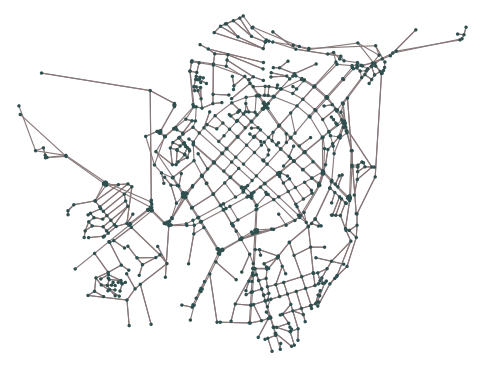

In [24]:
# ----- Build toy MultiGraph -----
PLACE = "Kentron, Yerevan, Armenia"   # small; fast for smoke tests
NETWORK = "drive"

# ---------- download (simplify=True by default here) ----------
G = ox.graph.graph_from_place(PLACE, network_type=NETWORK, simplify=True)

# keep only the largest connected component (weak is fine for roads)
G = ox.truncate.largest_component(G, strongly=False)

keep_node = {"x", "y", "street_count"}
keep_edge = {"length", "highway", "name", "maxspeed"}

for _, d in G.nodes(data=True):
    for k in list(d.keys()):
        if k not in keep_node:
            d.pop(k, None)

for u, v, k, d in G.edges(keys=True, data=True):
    for kk in list(d.keys()):
        if kk not in keep_edge:
            d.pop(kk, None)
fig, ax = ox.plot.plot_graph(
    G,
    figsize=(6, 6),
    bgcolor="white",
    node_color="#2f4f4f",
    node_size=6,
    edge_color="#877778",
    edge_linewidth=0.8,
    show=False,
    close=False,
)

### UCS

In [25]:
start_node_id = list(G.nodes)[0]  #'Maralik'
goal_node_id = list(G.nodes)[564] #'Vagharshapat'
initial = GraphState(G, start_node_id)
goal_test = SimpleGoalTest(goal_node_id)
ucs = UCSGraphSearch()
solution = ucs.find_solution(initial, goal_test)

In [26]:
if solution:
    path = extract_node_id_path(solution)

    print("Solution path:", path)
    print("Total cost (meters):", solution.path_cost)
    print("Nodes expanded:", ucs._number_of_nodes)
else:
    print("No solution found.")

Solution path: [256031437, 5026483106, 5026483105, 5009318171, 10831681874, 1475774820, 1807998351, 5118314365, 10831688447, 8913362246, 5035725114, 5026483107, 9280261372, 5489385514, 9227012882, 5489385511, 5450648349, 4296905827, 12593950281, 10970452605, 407729613, 632031882, 6277581589, 2420195983, 6277581586, 6277581587, 3831529185, 11648601295, 11648561414, 11648561419, 11648561420, 11644940327, 11648561426, 11648561428, 407729599, 1970926499, 4110471701, 4110471700, 4234582615]
Total cost (meters): 3593.7360494207596
Nodes expanded: 755


### A* Search

In [27]:
# Pick valid start and goal nodes
start_node_id = list(G.nodes)[0]
goal_node_id = list(G.nodes)[564]

initial = GraphState(G, start_node_id)
goal_test = SimpleGoalTest(goal_node_id)

# Build heuristic h(state)
h = build_euclidean_heuristic(G, goal_node_id)

# Run A* graph search
astar = AStarGraphSearch()
solution_astar = astar.find_solution(initial, goal_test, h)

In [28]:
# ----- Print path -----
if solution_astar:
    path = extract_node_id_path(solution_astar)

    print("Solution path:", path)
    print("Total cost (meters):", solution_astar.path_cost)
    print("Nodes expanded:", astar.get_expanded_node_count())
else:
    print("No solution found.")

Solution path: [256031437, 5026483106, 5026483105, 5009318171, 10831681874, 1475774820, 1807998351, 5118314365, 10831688447, 8913362246, 5035725114, 5026483107, 9280261372, 5489385514, 9227012882, 5489385511, 5450648349, 4296905827, 12593950281, 10970452605, 407729613, 632031882, 6277581589, 2420195983, 6277581586, 6277581587, 3831529185, 11648601295, 11648561414, 11648561419, 11648561420, 11644940327, 11648561426, 11648561428, 407729599, 1970926499, 4110471701, 4110471700, 4234582615]
Total cost (meters): 3593.7360494207596
Nodes expanded: 117


In [29]:
# ----- Print path -----
if solution_astar:
    path = extract_node_id_path(solution_astar)

    print("Solution path:", path)
    print("Total cost (meters):", solution_astar.path_cost)
    print("Nodes expanded:", astar.get_expanded_node_count())
else:
    print("No solution found.")

Solution path: [256031437, 5026483106, 5026483105, 5009318171, 10831681874, 1475774820, 1807998351, 5118314365, 10831688447, 8913362246, 5035725114, 5026483107, 9280261372, 5489385514, 9227012882, 5489385511, 5450648349, 4296905827, 12593950281, 10970452605, 407729613, 632031882, 6277581589, 2420195983, 6277581586, 6277581587, 3831529185, 11648601295, 11648561414, 11648561419, 11648561420, 11644940327, 11648561426, 11648561428, 407729599, 1970926499, 4110471701, 4110471700, 4234582615]
Total cost (meters): 3593.7360494207596
Nodes expanded: 117


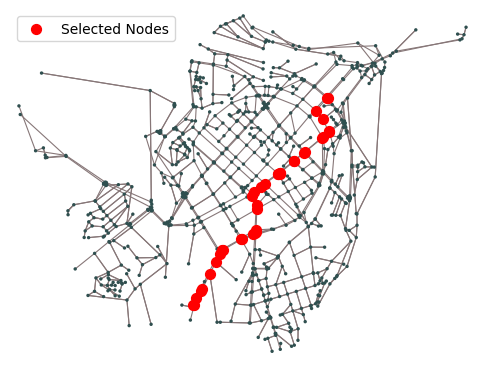

In [30]:
x_coords = [G.nodes[n]["x"] for n in path if n in G.nodes]
y_coords = [G.nodes[n]["y"] for n in path if n in G.nodes]

# replot with highlight
fig, ax = ox.plot.plot_graph(
    G,
    figsize=(6, 6),
    bgcolor="white",
    node_color="#2f4f4f",
    node_size=6,
    edge_color="#877778",
    edge_linewidth=0.8,
    show=False,
    close=False,
)

# plot the chosen nodes in red
ax.scatter(x_coords, y_coords, c="red", s=50, zorder=5, label="Selected Nodes")
ax.legend()

### Bidirectional Search

In [31]:
# Pick valid start and goal nodes
start_node_id = list(G.nodes)[0]
goal_node_id = list(G.nodes)[564]

initial = GraphState(G, start_node_id)
goal_test = SimpleGoalTest(goal_node_id)

# Run Bidirectional graph search
bidirectional = BidirectionalGraphSearch()
solution_bidirectional = bidirectional.find_solution(initial, goal_test)

In [32]:
# ----- Print path -----
if solution_bidirectional:
    path = extract_node_id_path(solution_bidirectional)
    print("Solution path:", path)
    print("Total cost (meters):", solution_bidirectional.path_cost)
    print("Nodes expanded:", bidirectional.get_expanded_node_count())
else:
    print("No solution found.")

Solution path: [256031437, 5026483106, 5026483105, 5009318171, 10831681874, 1475774820, 1807998351, 5118314365, 10831688447, 8913362246, 5035725114, 5026483107, 9280261372, 5489385514, 9227012882, 5489385511, 5450648349, 4296905827, 12593950281, 10970452605, 407729613, 632031882, 6277581589, 2420195983, 6277581586, 6277581587, 3831529185, 11648601295, 11648561414, 11648561419, 11648561420, 11644940327, 11648561426, 11648561428, 407729599, 1970926499, 4110471701, 4110471700, 4234582615]
Total cost (meters): 3593.7360494207596
Nodes expanded: 1400


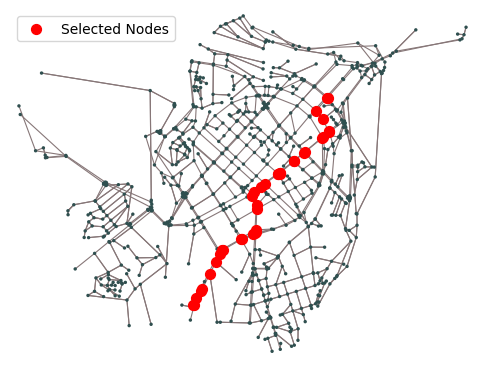

In [33]:
x_coords = [G.nodes[n]["x"] for n in path if n in G.nodes]
y_coords = [G.nodes[n]["y"] for n in path if n in G.nodes]

# replot with highlight
fig, ax = ox.plot.plot_graph(
    G,
    figsize=(6, 6),
    bgcolor="white",
    node_color="#2f4f4f",
    node_size=6,
    edge_color="#877778",
    edge_linewidth=0.8,
    show=False,
    close=False,
)

# plot the chosen nodes in red
ax.scatter(x_coords, y_coords, c="red", s=50, zorder=5, label="Selected Nodes")
ax.legend()

### DLitteSearch

In [34]:
def plot_graph_with_path(
    G,
    path,
    node_color="red",
    edge_color="red",
    blocked_edges=None,
    blocked_color="orange",
    blocked_width=4
):
    """
    G             : OSMnx/NetworkX graph
    path          : list of node IDs representing the selected path
    blocked_edges : set of (u, v) pairs (order does not matter)
    blocked_color : color for blocked edges
    blocked_width : linewidth for blocked edges
    """

    # --- 1) Base graph plot ---
    fig, ax = ox.plot.plot_graph(
        G,
        figsize=(6, 6),
        bgcolor="white",
        node_color="#2f4f4f",
        node_size=6,
        edge_color="#877778",
        edge_linewidth=0.8,
        show=False,
        close=False,
    )

    # --- 2) Plot path nodes ---
    x_coords = [G.nodes[n]["x"] for n in path]
    y_coords = [G.nodes[n]["y"] for n in path]
    ax.scatter(x_coords, y_coords, c=node_color, s=50, zorder=6)

    # --- 3) Plot path edges ---
    ax.plot(x_coords, y_coords, color=edge_color, linewidth=3, zorder=5)

    # --- 4) Plot blocked edges ---
    if blocked_edges:
        # Make blocked_edges order-insensitive
        blocked_set = {(u, v) for u, v in blocked_edges} | {(v, u) for u, v in blocked_edges}

        for u, v, data in G.edges(keys=False, data=True):
            if (u, v) in blocked_set:
                # If the edge has geometry, draw it accurately
                if "geometry" in data:
                    xs, ys = data["geometry"].xy
                else:
                    xs = [G.nodes[u]["x"], G.nodes[v]["x"]]
                    ys = [G.nodes[u]["y"], G.nodes[v]["y"]]

                ax.plot(
                    xs,
                    ys,
                    color=blocked_color,
                    linewidth=blocked_width,
                    alpha=0.9,
                    zorder=7,
                )

    return fig, ax


In [35]:
G_work = G.copy()
start_node_id = list(G_work.nodes)[0]
goal_node_id = list(G_work.nodes)[564]
dlit = DStarSearch(G_work, start_node_id, goal_node_id, edge_cost_changer=EdgeCostChanger(G_work)) #no edge cost occurs
 #change edge list will return none as no edge is beign changed
path, chaned_edge_list, nodes_expanded = dlit.main()

Path Cost: 3593.7360494207596


ValueError: not enough values to unpack (expected 3, got 2)

(<Figure size 600x600 with 1 Axes>, <Axes: >)

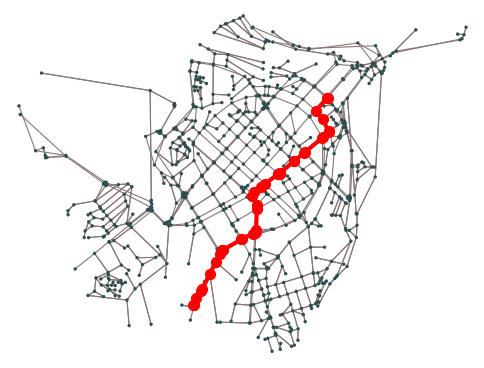

In [ ]:
plot_graph_with_path(G, path)

In [ ]:
node_to_block = path[11]
node_to_block
G_work = G.copy()
scheduler = EdgeCostChanger(G_work, node_to_block, radius=2, time_to_block=2, factor=100)
start_node_id = list(G_work.nodes)[0]
goal_node_id = list(G_work.nodes)[564]
dlit = DStarSearch(G_work, start_node_id, goal_node_id, edge_cost_changer=scheduler) #no edge cost occurs
path, chaned_edge_list, nodes_expanded = dlit.main()  #change edge list will return none as no edge is beign changed

Path Cost: 3760.3143436769815


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
plot_graph_with_path(G_work, path, blocked_edges=chaned_edge_list, edge_color='red')

NameError: name 'chaned_edge_list' is not defined

# Dynamic A star vs Dstar

In [ ]:
start_node_id = list(G.nodes)[0]
goal_node_id = list(G.nodes)[564]
initial = GraphState(G, start_node_id)
goal_test = SimpleGoalTest(goal_node_id)

D star

In [ ]:
G_work = G.copy()


# 3. Create edge changer and dynamic A*
edge_changer = ProbabilisticEdgeCostChanger(
    G_work,
    step_change_prob=0.5,
    num_edges_to_change=5,
    factor_range=(2.0, 4.0),
    weight_key="length",
    copy_graph=False,   # already copied above
    random_seed=42,
)

dlit = DStarSearch(G_work, start_node_id, goal_node_id, edge_cost_changer=edge_changer) #no edge cost occurs
path, chaned_edge_list, nodes_expanded = dlit.main()

Path Cost: 3593.731


A star

In [ ]:
G_work = G.copy()

# 2. Build goal-based heuristic on the *working* graph
goal_id = goal_test.get_goal_node()
heuristic = build_euclidean_heuristic(G_work, goal_id)

# 3. Create edge changer and dynamic A*
edge_changer = ProbabilisticEdgeCostChanger(
    G_work,
    step_change_prob=0.3,
    num_edges_to_change=5,
    factor_range=(2.0, 4.0),
    weight_key="length",
    copy_graph=False,   # already copied above
    random_seed=42,
)
dyn_astar = DynamicAStarGraphSearch(edge_changer)

# 4. Initial state uses the same working graph
start_state = GraphState(G_work, start_node_id)

# 5. Run dynamic A*
goal_node_dyn = dyn_astar.find_solution(start_state, goal_test, heuristic)
total_astar_expanded = dyn_astar.get_total_expanded_node_count()

In [ ]:
G_work = G.copy()


# 3. Create edge changer and dynamic A*
edge_changer = ProbabilisticEdgeCostChanger(
    G_work,
    step_change_prob=0.5,
    num_edges_to_change=5,
    factor_range=(2.0, 4.0),
    weight_key="length",
    copy_graph=False,   # already copied above
    random_seed=42,
)

dlit = DStarSearch(G_work, start_node_id, goal_node_id, edge_cost_changer=edge_changer) #no edge cost occurs
path, chaned_edge_list, nodes_expanded = dlit.main()

G_work = G.copy()

# 2. Build goal-based heuristic on the *working* graph
goal_id = goal_test.get_goal_node()
heuristic = build_euclidean_heuristic(G_work, goal_id)

# 3. Create edge changer and dynamic A*
edge_changer = ProbabilisticEdgeCostChanger(
    G_work,
    step_change_prob=0.3,
    num_edges_to_change=5,
    factor_range=(2.0, 4.0),
    weight_key="length",
    copy_graph=False,   # already copied above
    random_seed=42,
)
dyn_astar = DynamicAStarGraphSearch(edge_changer)

# 4. Initial state uses the same working graph
start_state = GraphState(G_work, start_node_id)

# 5. Run dynamic A*
goal_node_dyn = dyn_astar.find_solution(start_state, goal_test, heuristic)
total_astar_expanded = dyn_astar.get_total_expanded_node_count()

Path Cost: 3593.731


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_values = np.linspace(0.0, 0.9, 10)

dstar_expanded = []
astar_expanded = []

for p in p_values:
    print(f"Running for p = {p:.2f}")

    # -------- D* Lite run --------
    G_d = G.copy()

    edge_changer_d = ProbabilisticEdgeCostChanger(
        G_d,
        step_change_prob=p,
        num_edges_to_change=5,
        factor_range=(2.0, 4.0),
        weight_key="length",
        copy_graph=False,
        random_seed=42,    # fixed seed per run for reproducibility
    )

    dstar = DStarSearch(G_d, start_node_id, goal_node_id, edge_cost_changer=edge_changer_d)
    path_d, changed_edges_d, nodes_expanded_d = dstar.main()
    dstar_expanded.append(nodes_expanded_d)

    # -------- Dynamic A* run --------
    G_a = G.copy()

    # Heuristic built on the working graph
    goal_id = goal_test.get_goal_node()
    heuristic = build_euclidean_heuristic(G_a, goal_id)

    edge_changer_a = ProbabilisticEdgeCostChanger(
        G_a,
        step_change_prob=p,
        num_edges_to_change=5,
        factor_range=(2.0, 4.0),
        weight_key="length",
        copy_graph=False,
        random_seed=42,   # separate run, but deterministic for this p
    )

    dyn_astar = DynamicAStarGraphSearch(edge_changer_a)
    start_state = GraphState(G_a, start_node_id)
    goal_node_dyn = dyn_astar.find_solution(start_state, goal_test, heuristic)
    total_astar_expanded = dyn_astar.get_total_expanded_node_count()
    astar_expanded.append(total_astar_expanded)

Running for p = 0.00
Path Cost: 3593.731
Running for p = 0.10
Path Cost: 3593.731
Running for p = 0.20
Path Cost: 3593.731
Running for p = 0.30
Path Cost: 3593.731
Running for p = 0.40
Path Cost: 3593.731
Running for p = 0.50
Path Cost: 3593.731
Running for p = 0.60
Path Cost: 3775.6782999886586
Running for p = 0.70
Path Cost: 3606.494897977505
Running for p = 0.80
Path Cost: 3606.494897977505
Running for p = 0.90
Path Cost: 3606.494897977505


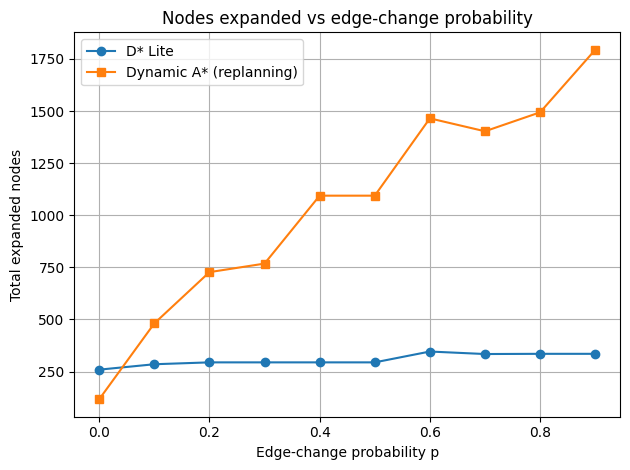

In [ ]:
plt.figure()
plt.plot(p_values, dstar_expanded, marker='o', label='D* Lite')
plt.plot(p_values, astar_expanded, marker='s', label='Dynamic A* (replanning)')

plt.xlabel("Edge-change probability p")
plt.ylabel("Total expanded nodes")
plt.title("Nodes expanded vs edge-change probability")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()